<a href="https://colab.research.google.com/github/isaacyeremia/project-Clustering/blob/main/Project_EDA1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [62]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [63]:
import pandas as pd

# Baca file Excel dari Google Drive
file_path = '/content/drive/MyDrive/Data_mining/IP___Riwayat_Medical_01012016 s.d 19032024(1).xls'
df = pd.read_excel(file_path)

In [64]:
# Cek jumlah data yang hilang (missing data) di setiap kolom
print(df.isnull().sum())


no                  0
diagnosa            0
institusi           0
area                0
rumah            1131
tipe             2750
biaya_berobat      25
dtype: int64


In [65]:
# prompt: tolong handle data mising yang ada di kolom fitur fitur berikut ini dengan mengisi kolom data mising:
# no                  0
# diagnosa            0
# institusi           0
# area                0
# rumah            1131
# tipe             2750
# biaya_berobat      25
# dtype: int64

from google.colab import drive
import pandas as pd
drive.mount('/content/drive')

# Baca file Excel dari Google Drive
file_path = '/content/drive/MyDrive/Data_mining/IP___Riwayat_Medical_01012016 s.d 19032024(1).xls'
df = pd.read_excel(file_path)

# Mengisi missing value pada kolom 'rumah' dengan modus (nilai yang paling sering muncul)
df['rumah'].fillna(df['rumah'].mode()[0], inplace=True)

# Mengisi missing value pada kolom 'tipe' dengan modus (nilai yang paling sering muncul)
df['tipe'].fillna(df['tipe'].mode()[0], inplace=True)

# Mengisi missing value pada kolom 'biaya_berobat' dengan median (nilai tengah)
df['biaya_berobat'].fillna(df['biaya_berobat'].median(), inplace=True)

# Cek kembali jumlah data yang hilang (missing data) di setiap kolom
print(df.isnull().sum())


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
no               0
diagnosa         0
institusi        0
area             0
rumah            0
tipe             0
biaya_berobat    0
dtype: int64


<ipython-input-65-64fb50c67e10>:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['rumah'].fillna(df['rumah'].mode()[0], inplace=True)
<ipython-input-65-64fb50c67e10>:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)',

In [66]:
# prompt: simpan dataset yang sudah terhandle, ke gdrive

# Simpan dataset yang sudah dihandle ke Google Drive
output_file_path = '/content/drive/MyDrive/Data_mining/IP___Riwayat_Medical_01012016 s.d 19032024_handled.xlsx'
df.to_excel(output_file_path, index=False)

print(f"Dataset berhasil disimpan ke: {output_file_path}")

Dataset berhasil disimpan ke: /content/drive/MyDrive/Data_mining/IP___Riwayat_Medical_01012016 s.d 19032024_handled.xlsx


In [67]:
# prompt: tolong buat semua isi data menjadi lowercase dan buat agar isi kolom fitur biaya_berobat menjadi range 250.000, jadi contoh pertama 0-250.000 lalu kedua ada 250.000-500.000

# Convert all string columns to lowercase
for column in df.select_dtypes(['object']):
  df[column] = df[column].str.lower()

# Create a new column for the range of biaya_berobat
def categorize_biaya(biaya):
  if biaya <= 250000:
    return '0-250.000'
  elif biaya <= 500000:
    return '250.000-500.000'
  elif biaya <= 750000:
    return '500.000-750.000'
  elif biaya <= 1000000:
    return '750.000-1.000.000'
  else:
    return '>1.000.000'

df['range_biaya_berobat'] = df['biaya_berobat'].apply(categorize_biaya)

# Print the updated DataFrame
print(df.head())


# Simpan dataset yang sudah dihandle ke Google Drive
output_file_path = '/content/drive/MyDrive/Data_mining/IP___Riwayat_Medical_01012016 s.d 19032024_handled_lowercase_range.xlsx'
df.to_excel(output_file_path, index=False)

print(f"Dataset berhasil disimpan ke: {output_file_path}")

   no         diagnosa     institusi     area                          rumah  \
0   1  hiperkolesterol   rumah sakit  bandung                   rs borromeus   
1   2   hiperlipidemia  laboratorium    garut  klinik bhakti ip kosaka garut   
2   3   hiperlipidemia    poliklinik    garut  klinik bhakti ip kosaka garut   
3   4          vertigo    poliklinik    garut  klinik bhakti ip kosaka garut   
4   5         check up  laboratorium    garut  klinik bhakti ip kosaka garut   

          tipe  biaya_berobat range_biaya_berobat  
0  dokter umum      1172500.0          >1.000.000  
1  dokter umum       454000.0     250.000-500.000  
2  dokter umum        59000.0           0-250.000  
3  dokter umum        80500.0           0-250.000  
4  dokter umum       586000.0     500.000-750.000  
Dataset berhasil disimpan ke: /content/drive/MyDrive/Data_mining/IP___Riwayat_Medical_01012016 s.d 19032024_handled_lowercase_range.xlsx


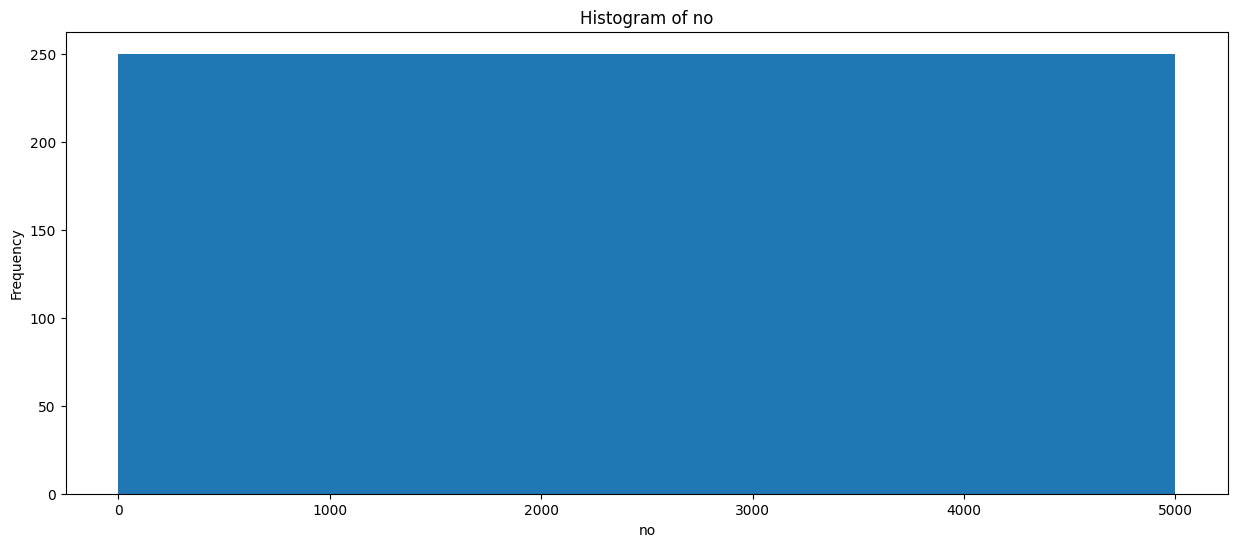

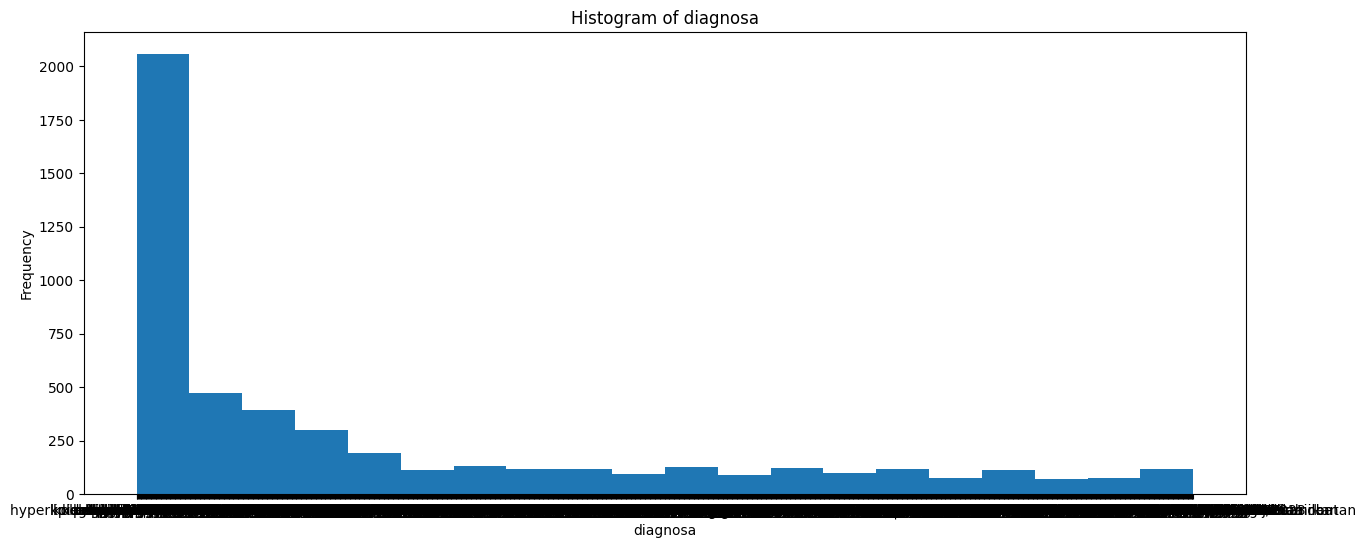

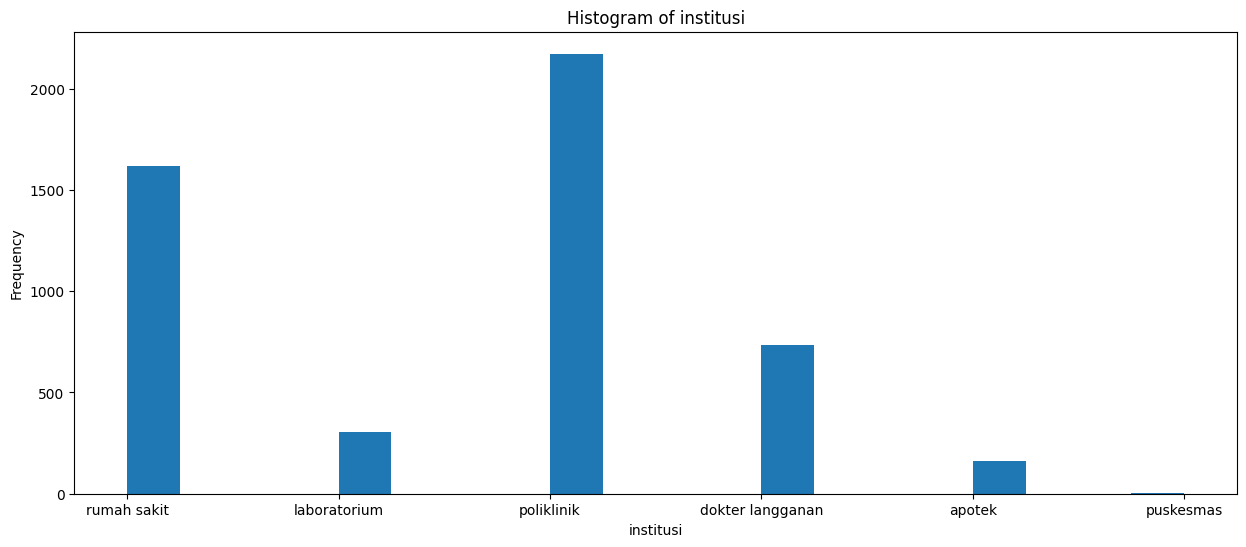

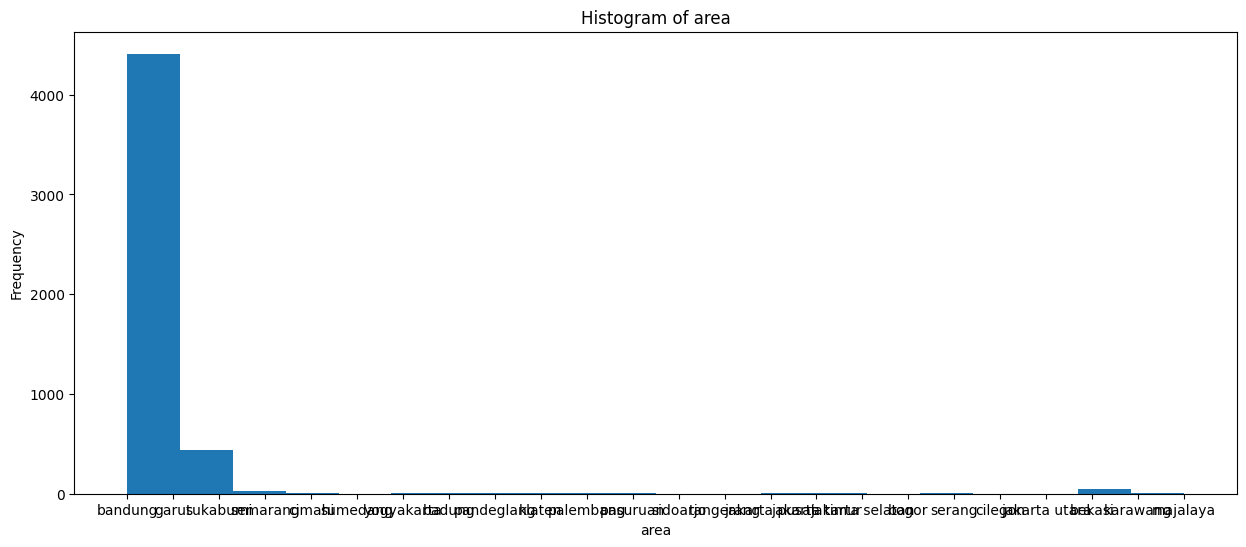

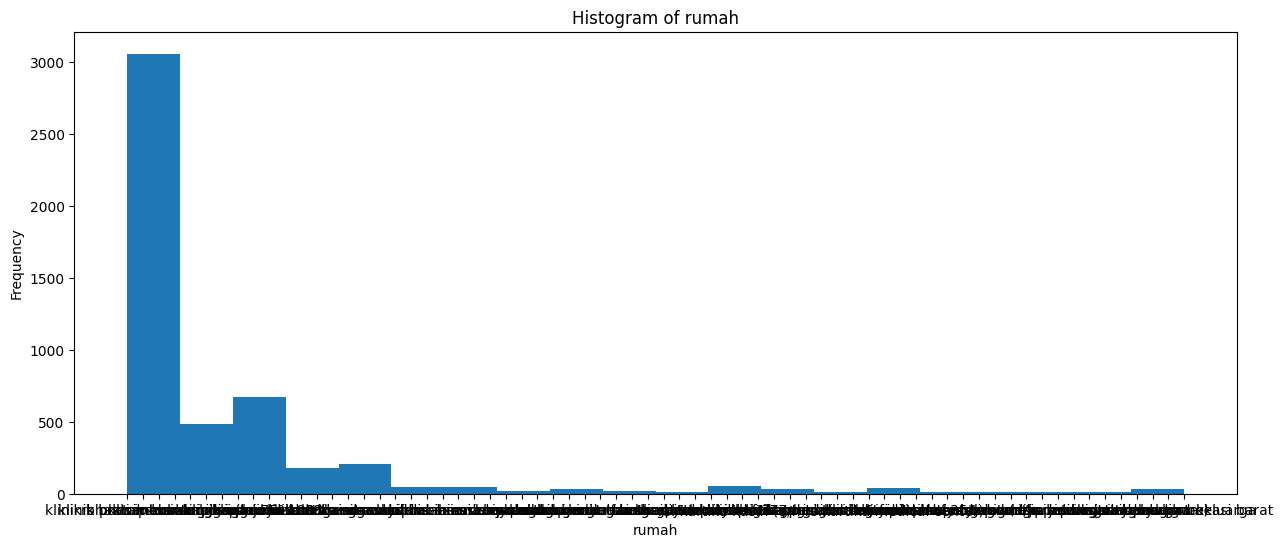

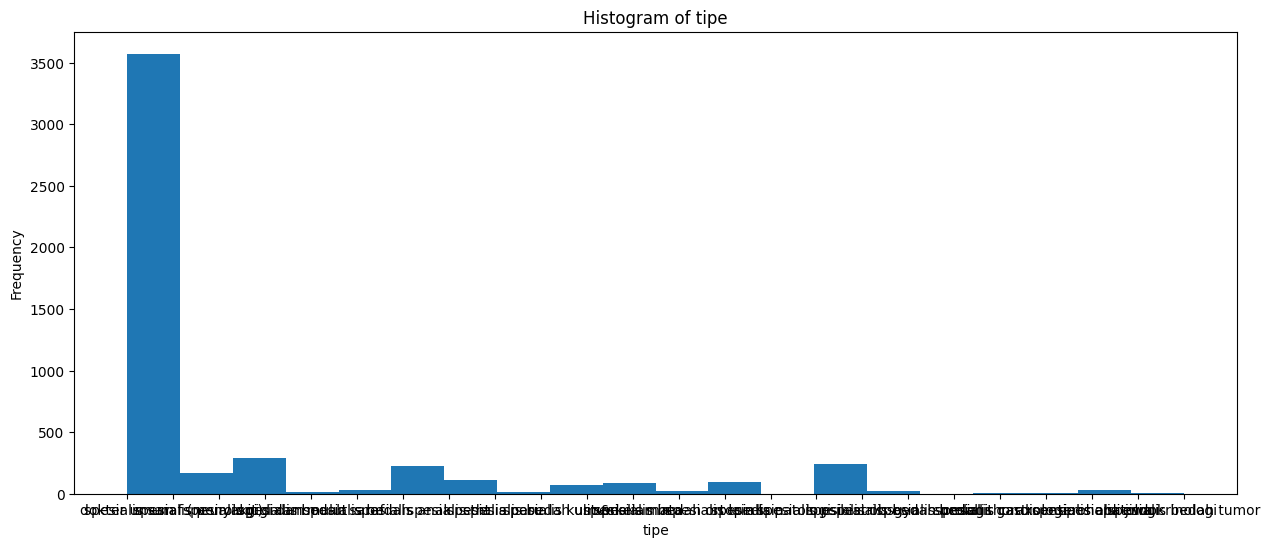

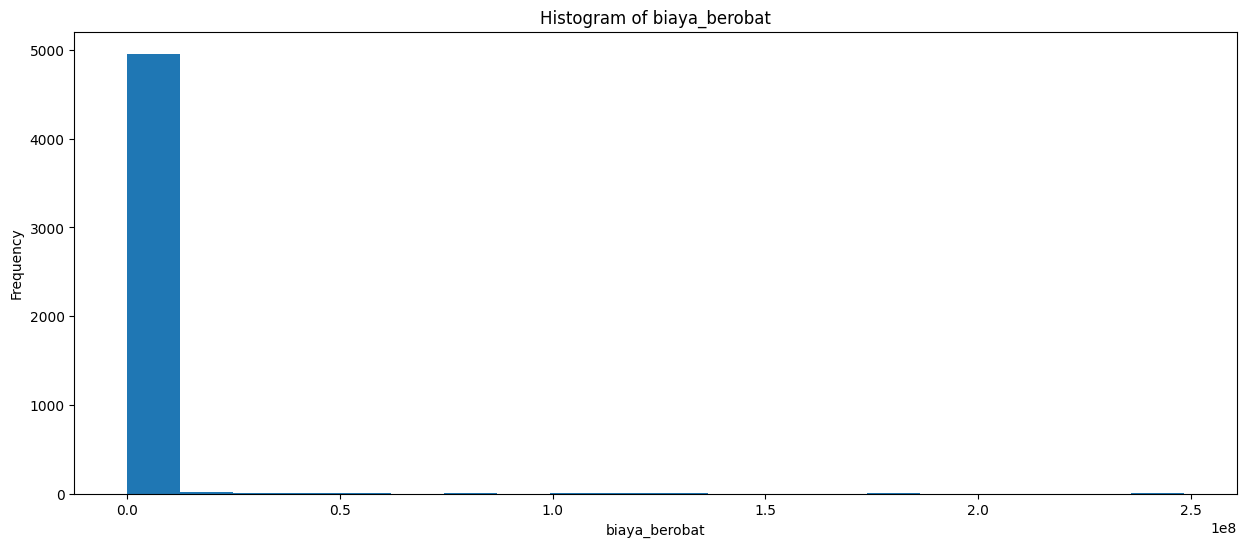

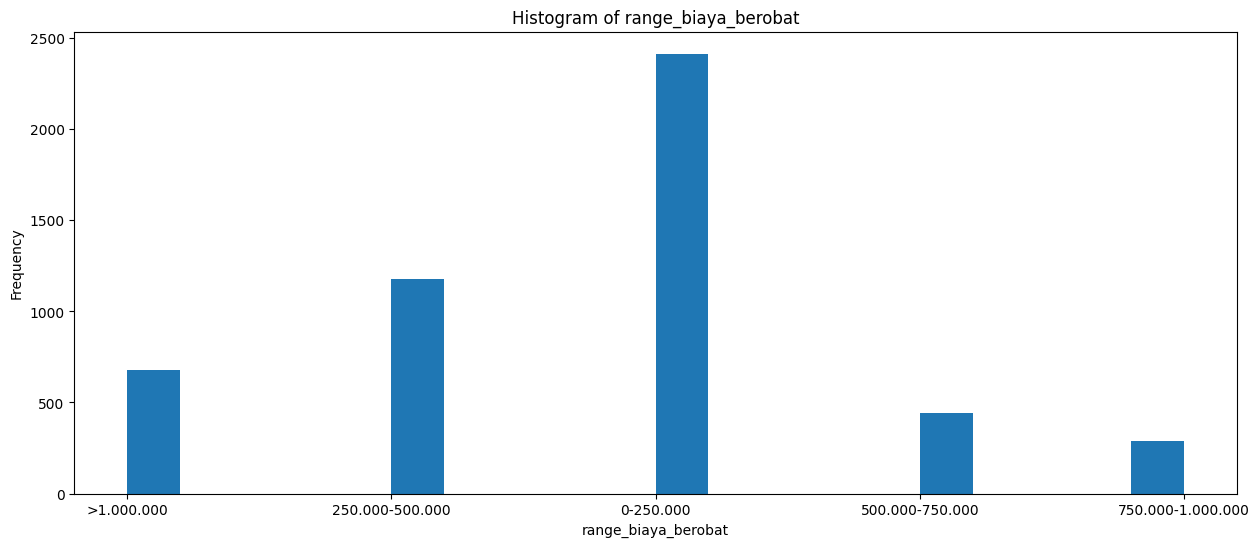

In [68]:

import matplotlib.pyplot as plt

for column in df.columns:
  plt.figure(figsize=(15, 6))  # Atur lebar dan panjang diagram
  plt.hist(df[column], bins=20)  # Buat histogram dengan 20 bins
  plt.title(f"Histogram of {column}")
  plt.xlabel(column)
  plt.ylabel("Frequency")
  plt.show()

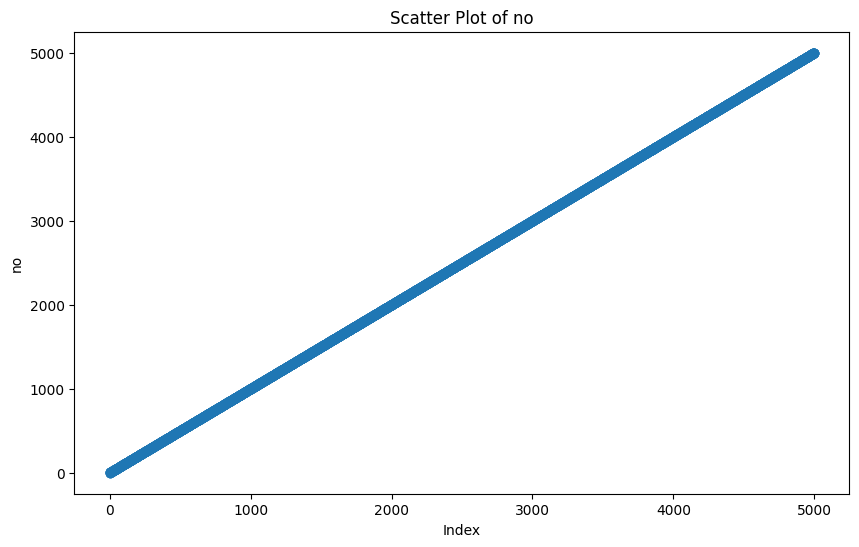

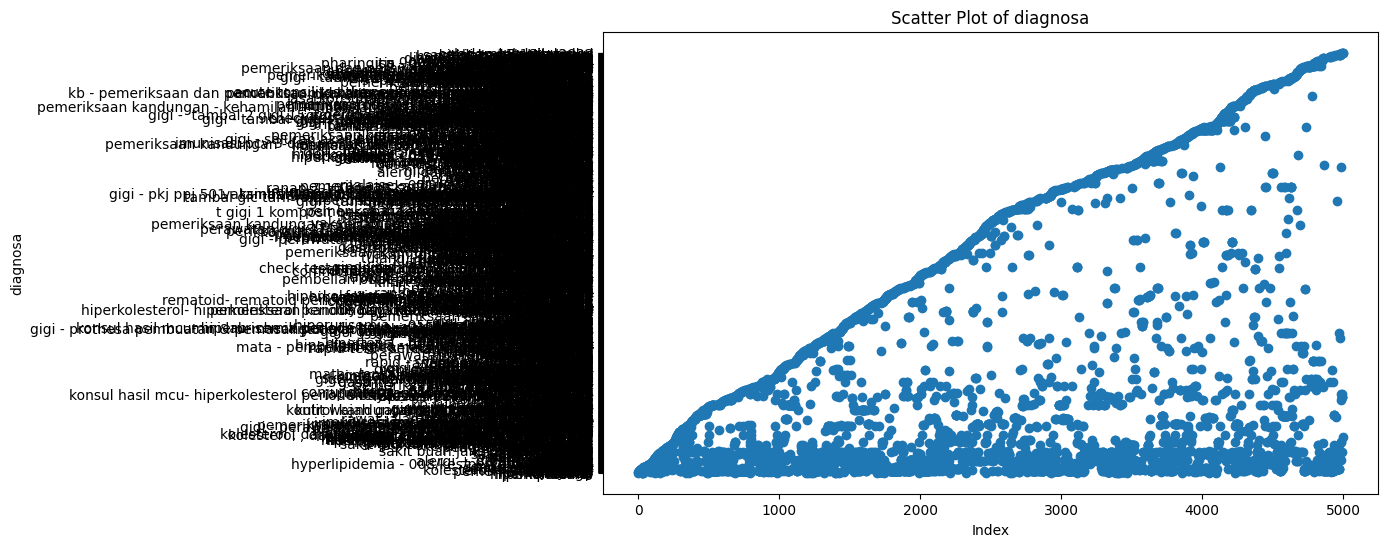

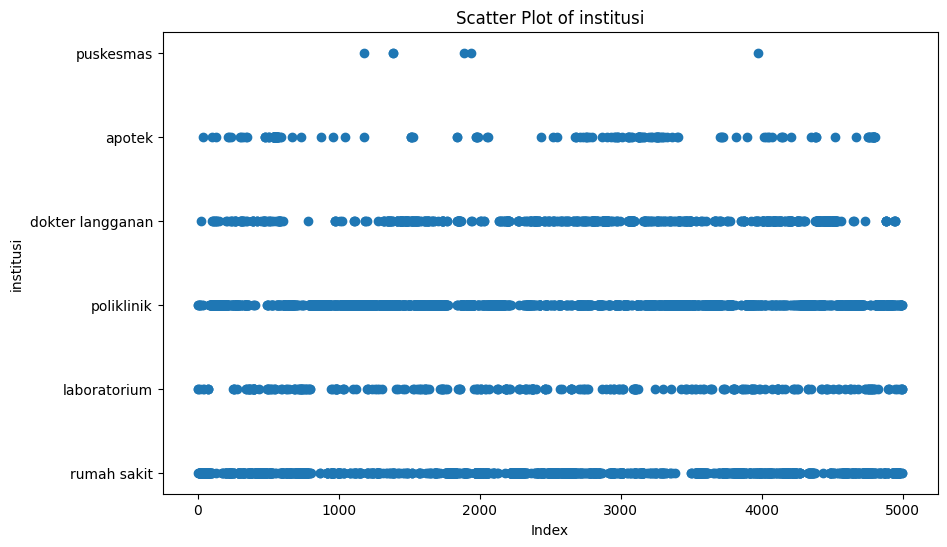

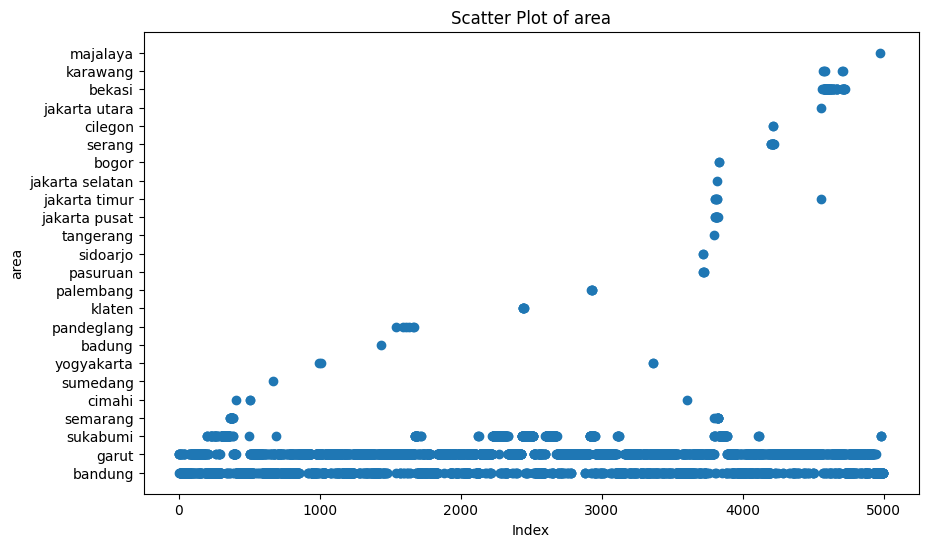

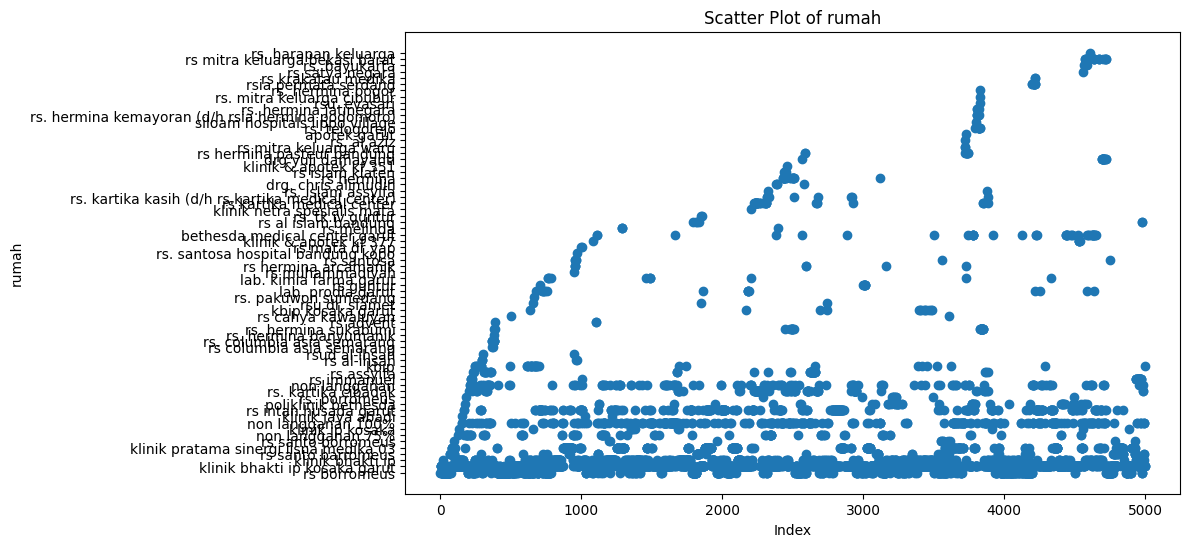

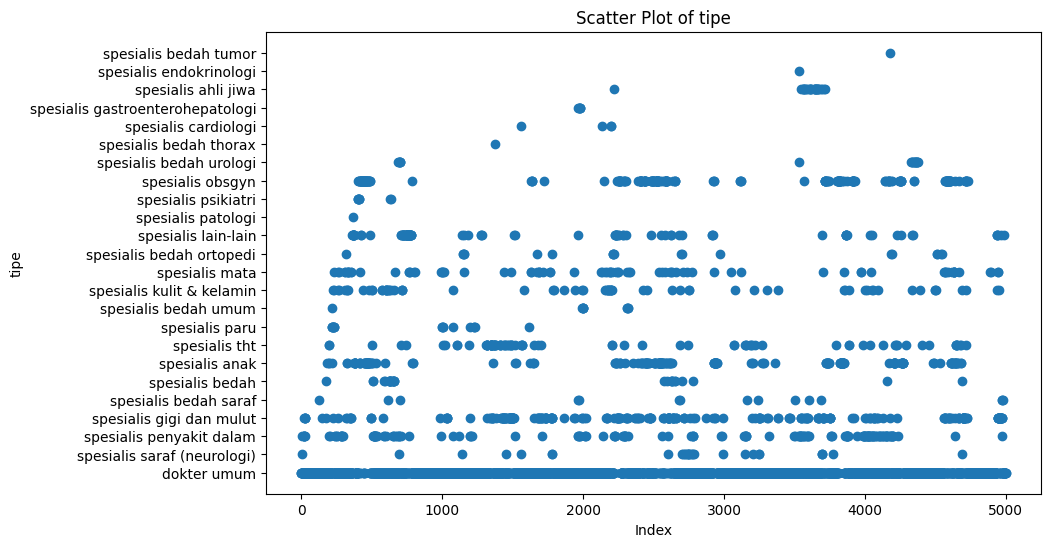

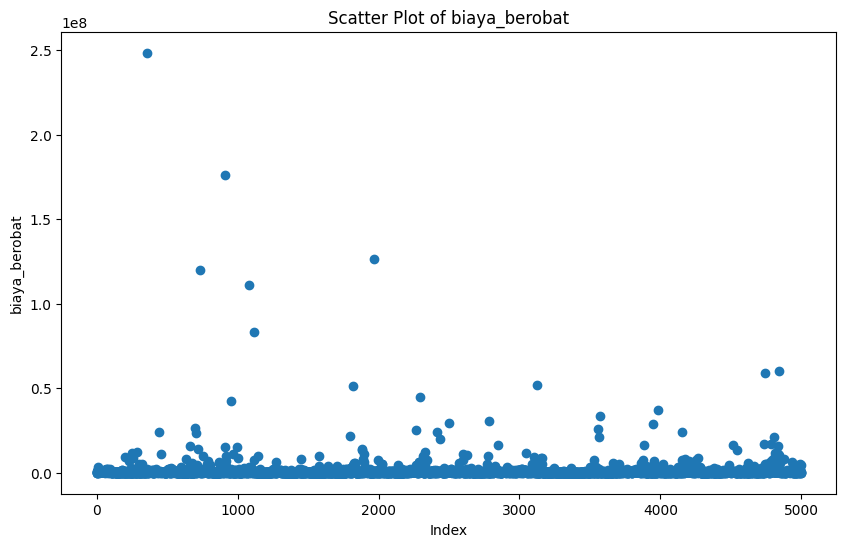

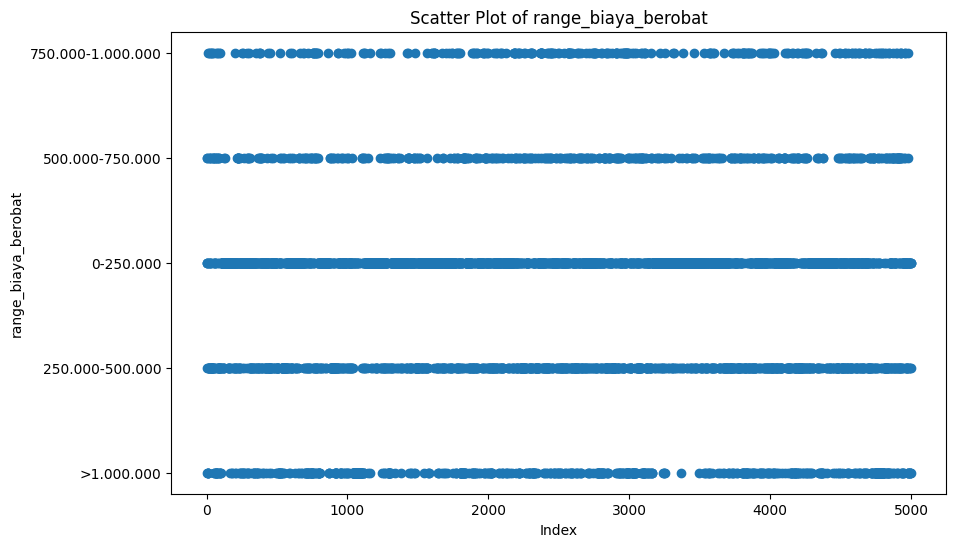

In [69]:
for column in df.columns:
  plt.figure(figsize=(10, 6))
  plt.scatter(df.index, df[column])
  plt.title(f"Scatter Plot of {column}")
  plt.xlabel("Index")
  plt.ylabel(column)
  plt.show()


In [70]:
from sklearn.preprocessing import LabelEncoder

# Mengasumsikan dataset adalah df dan kolom 'diagnosa' adalah kategorik
dataolahencoding = df.copy() # Membuat salinan dataset untuk mencegah modifikasi dataset asli

# Label encoding untuk kolom 'diagnosa'
encoder = LabelEncoder()
dataolahencoding['diagnosa_encod'] = encoder.fit_transform(dataolahencoding['diagnosa'])
dataolahencoding['institusi_encod'] = encoder.fit_transform(dataolahencoding['institusi'])
dataolahencoding['area_encod'] = encoder.fit_transform(dataolahencoding['area'])
dataolahencoding['rumah_encod'] = encoder.fit_transform(dataolahencoding['rumah'])
dataolahencoding['tipe_encod'] = encoder.fit_transform(dataolahencoding['tipe'])
dataolahencoding['biaya_berobat_encod'] = encoder.fit_transform(dataolahencoding['biaya_berobat'])

In [71]:

dataolahencoding.head()

no         diagnosa     institusi     area                          rumah  \
0   1  hiperkolesterol   rumah sakit  bandung                   rs borromeus   
1   2   hiperlipidemia  laboratorium    garut  klinik bhakti ip kosaka garut   
2   3   hiperlipidemia    poliklinik    garut  klinik bhakti ip kosaka garut   
3   4          vertigo    poliklinik    garut  klinik bhakti ip kosaka garut   
4   5         check up  laboratorium    garut  klinik bhakti ip kosaka garut   

          tipe  biaya_berobat range_biaya_berobat  diagnosa_encod  \
0  dokter umum      1172500.0          >1.000.000             404   
1  dokter umum       454000.0     250.000-500.000             409   
2  dokter umum        59000.0           0-250.000             409   
3  dokter umum        80500.0           0-250.000            1270   
4  dokter umum       586000.0     500.000-750.000             119   

   institusi_encod  area_encod  rumah_encod  tipe_encod  biaya_berobat_encod  
0                5           1           24           0                 2724  
1                2           6            9           0                 1890  
2                3           6            9           0                   51  
3                3           6            9           0                  137  
4                2           6            9           0                 2181

In [72]:
dataolahencoding = dataolahencoding.drop(['diagnosa', 'institusi', 'area', 'rumah', 'tipe', 'biaya_berobat'], axis=1)
dataolahencoding.head()


no range_biaya_berobat  diagnosa_encod  institusi_encod  area_encod  \
0   1          >1.000.000             404                5           1   
1   2     250.000-500.000             409                2           6   
2   3           0-250.000             409                3           6   
3   4           0-250.000            1270                3           6   
4   5     500.000-750.000             119                2           6   

   rumah_encod  tipe_encod  biaya_berobat_encod  
0           24           0                 2724  
1            9           0                 1890  
2            9           0                   51  
3            9           0                  137  
4            9           0                 2181

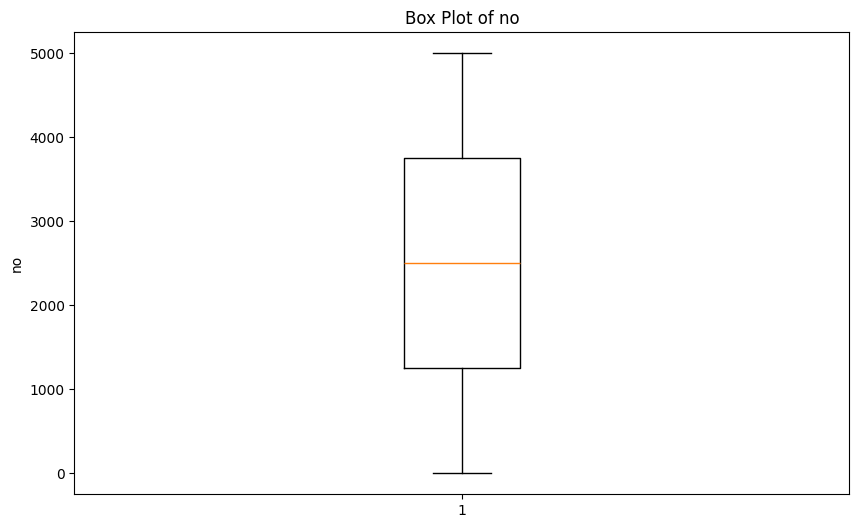

Skipping box plot for non-numeric column: range_biaya_berobat


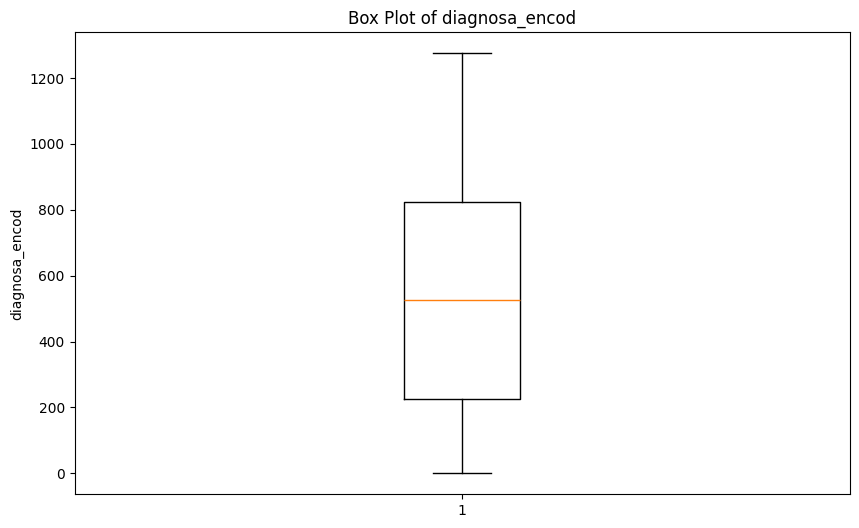

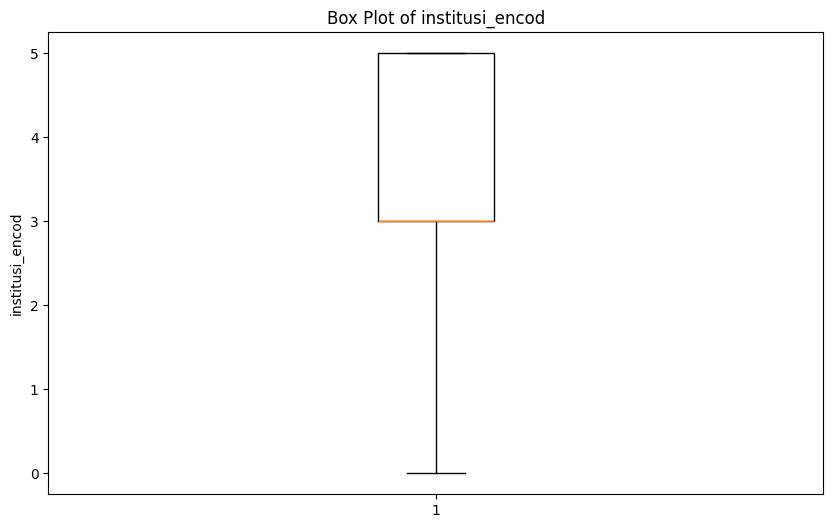

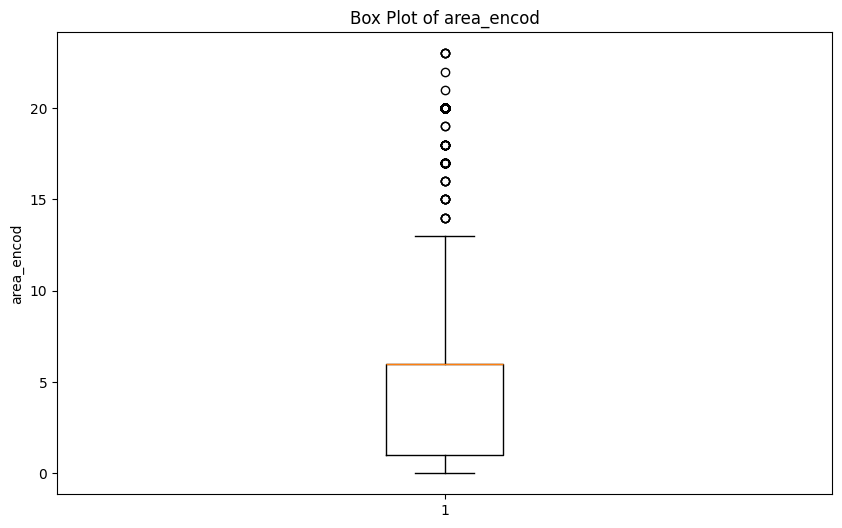

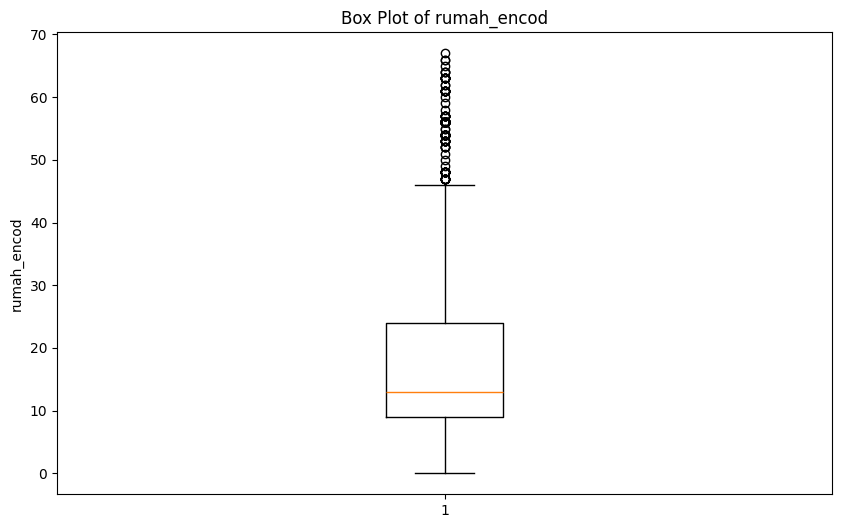

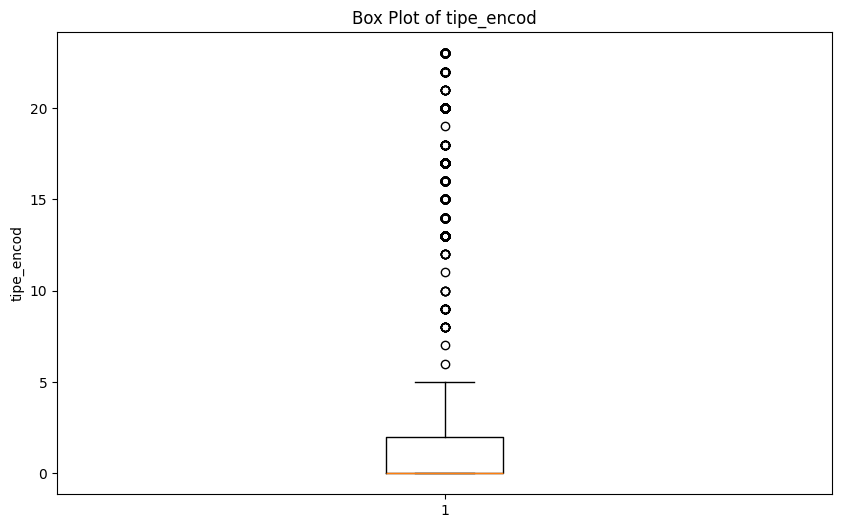

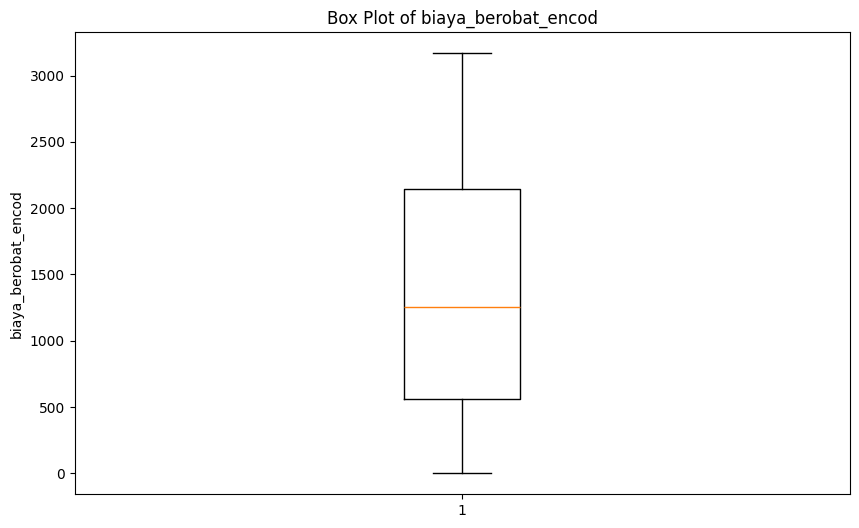

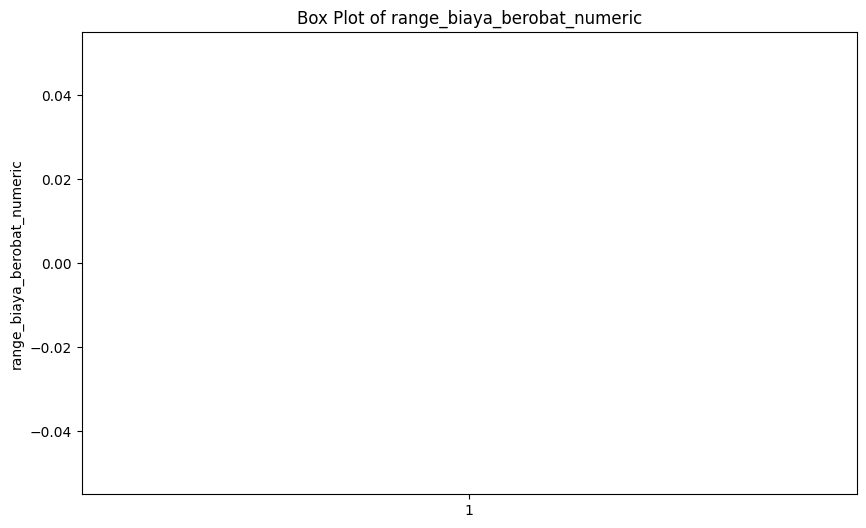

In [73]:
dataolahencoding['range_biaya_berobat_numeric'] = pd.to_numeric(dataolahencoding['range_biaya_berobat'].str.split('-').str[0], errors='coerce')

for column in dataolahencoding.columns:
  if pd.api.types.is_numeric_dtype(dataolahencoding[column]):  # Check if column is numeric
    plt.figure(figsize=(10, 6))
    plt.boxplot(dataolahencoding[column])
    plt.title(f"Box Plot of {column}")
    plt.ylabel(column)
    plt.show()
  else:
    print(f"Skipping box plot for non-numeric column: {column}")

In [74]:
import numpy as np
import pandas as pd

def find_outliers_iqr(data):
  # Convert data to numeric if it's not already
  if not pd.api.types.is_numeric_dtype(data):
    data = pd.to_numeric(data, errors='coerce')  # Convert to numeric, handle errors

  # Proceed with outlier calculation if data is numeric
  if pd.api.types.is_numeric_dtype(data):
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = [x for x in data if x < lower_bound or x > upper_bound]
    return outliers
  else:
    print(f"Skipping outlier calculation for non-numeric column")
    return []  # Return empty list for non-numeric columns

for column in dataolahencoding.columns:
  outliers = find_outliers_iqr(dataolahencoding[column])
  if outliers:
    print(f"Kolom '{column}' memiliki outlier:")
    print(outliers)
    print()

Kolom 'area_encod' memiliki outlier:
[20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 17, 17, 17, 20, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 20, 20, 20, 21, 20, 23, 23, 15, 15, 15, 15, 15, 15, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20

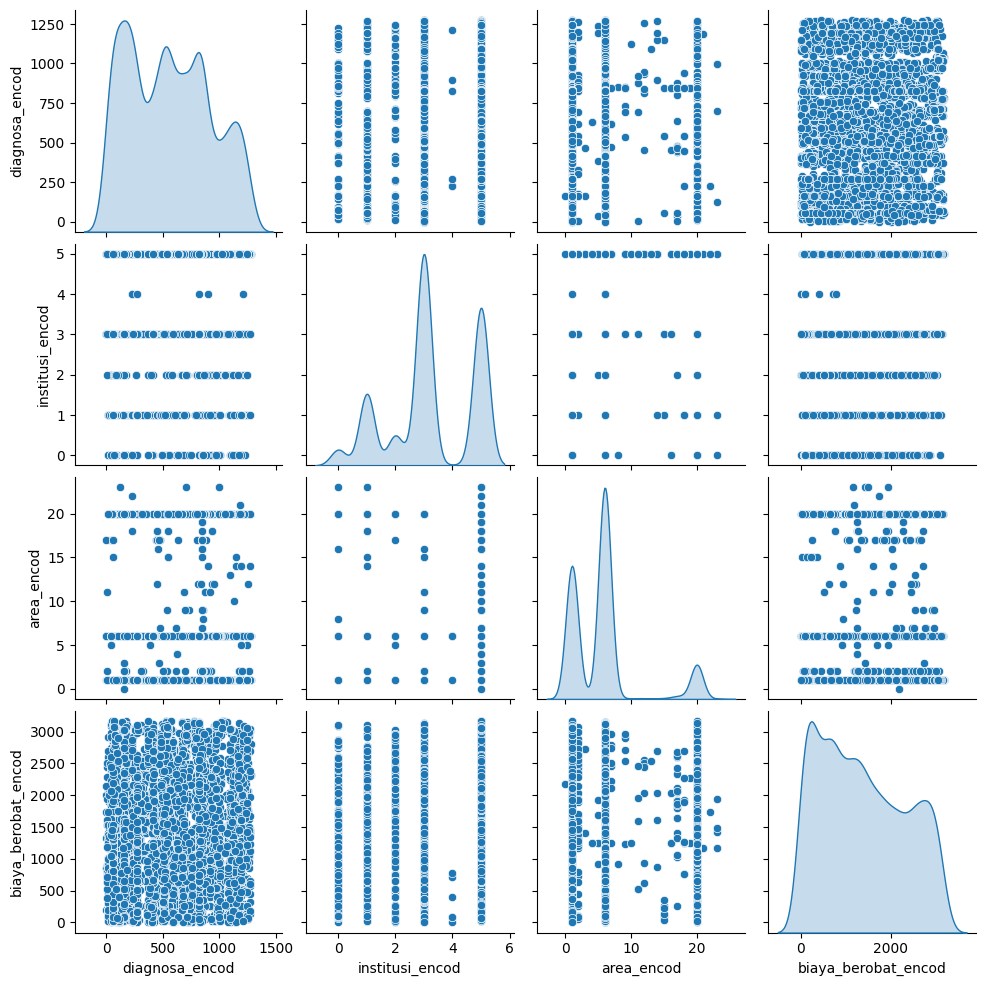

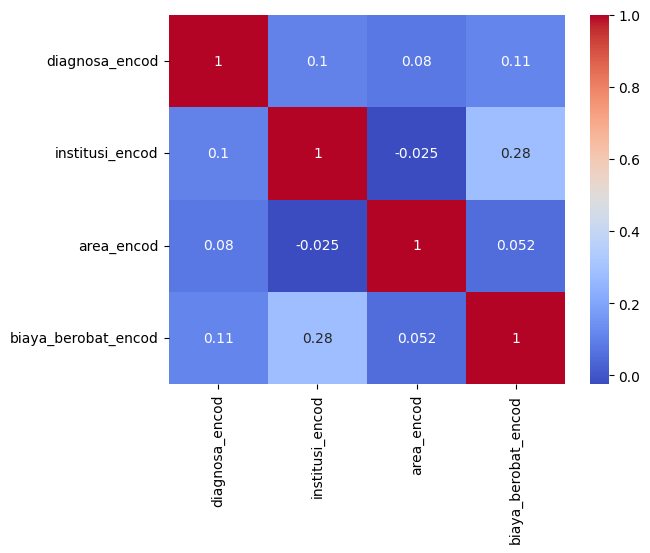

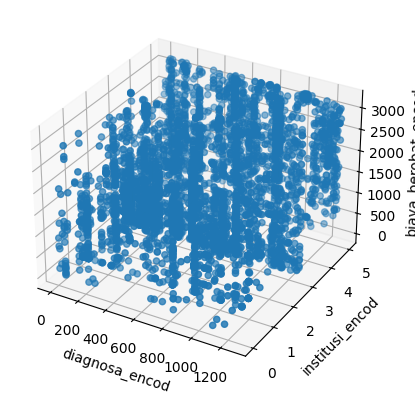

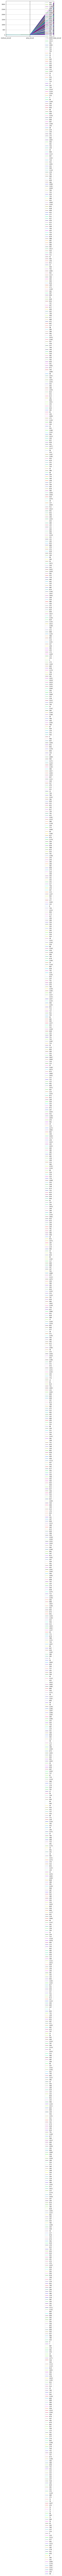

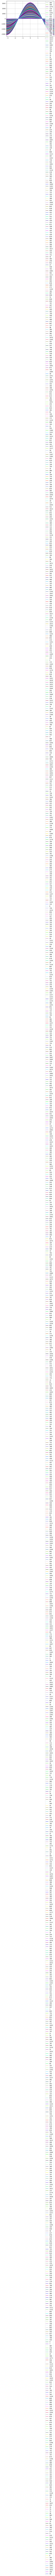

In [75]:
# prompt: Buatkan 5 diagram  MULTIVARIATE  ANALYSIS

import seaborn as sns
import matplotlib.pyplot as plt

# 1. Scatter Plot Matrix (untuk melihat hubungan antar variabel numerik)
sns.pairplot(dataolahencoding[['diagnosa_encod', 'institusi_encod', 'area_encod', 'biaya_berobat_encod']], diag_kind='kde')
plt.show()


# 2. Heatmap Korelasi (untuk melihat korelasi antar variabel numerik)
correlation_matrix = dataolahencoding[['diagnosa_encod', 'institusi_encod', 'area_encod', 'biaya_berobat_encod']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()


# 3. 3D Scatter Plot (untuk melihat hubungan antar tiga variabel numerik)
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(dataolahencoding['diagnosa_encod'], dataolahencoding['institusi_encod'], dataolahencoding['biaya_berobat_encod'])
ax.set_xlabel('diagnosa_encod')
ax.set_ylabel('institusi_encod')
ax.set_zlabel('biaya_berobat_encod')
plt.show()


# 4. Parallel Coordinates Plot (untuk melihat hubungan antar variabel numerik dan kategorik)
from pandas.plotting import parallel_coordinates

parallel_coordinates(dataolahencoding[['diagnosa_encod', 'institusi_encod', 'area_encod', 'biaya_berobat_encod']], 'diagnosa_encod')
plt.show()


# 5. Andrews Curves (untuk melihat hubungan antar variabel numerik dan kategorik)
from pandas.plotting import andrews_curves

andrews_curves(dataolahencoding[['diagnosa_encod', 'institusi_encod', 'area_encod', 'biaya_berobat_encod']], 'diagnosa_encod')
plt.show()

In [76]:
dataolahencoding

no range_biaya_berobat  diagnosa_encod  institusi_encod  area_encod  \
0        1          >1.000.000             404                5           1   
1        2     250.000-500.000             409                2           6   
2        3           0-250.000             409                3           6   
3        4           0-250.000            1270                3           6   
4        5     500.000-750.000             119                2           6   
...    ...                 ...             ...              ...         ...   
4995  4996          >1.000.000            1025                5           1   
4996  4997           0-250.000             159                2           1   
4997  4998     250.000-500.000             104                2           1   
4998  4999           0-250.000              90                2           1   
4999  5000           0-250.000             417                3           1   

      rumah_encod  tipe_encod  biaya_berobat_encod  \
0              24           0                 2724   
1               9           0                 1890   
2               9           0                   51   
3               9           0                  137   
4               9           0                 2181   
...           ...         ...                  ...   
4995           41           0                 3050   
4996            9           0                  519   
4997            9           0                 1753   
4998            9           0                  519   
4999            4           0                  660   

      range_biaya_berobat_numeric  
0                             NaN  
1                           250.0  
2                             0.0  
3                             0.0  
4                           500.0  
...                           ...  
4995                          NaN  
4996                          0.0  
4997                        250.0  
4998                          0.0  
4999                          0.0  

[5000 rows x 9 columns]

In [77]:

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [78]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer  # Import SimpleImputer

# Assuming 'dataolahencoding' is your DataFrame

# 1. Identify and handle non-numeric columns
for column in dataolahencoding.columns:
    if dataolahencoding[column].dtype == 'object':  # Check if column is of object type
        try:
            # Attempt to convert to numeric, replacing non-convertible values with NaN
            dataolahencoding[column] = pd.to_numeric(dataolahencoding[column], errors='coerce')
            # If needed, replace NaN with a suitable strategy (e.g., mean, median)
            #dataolahencoding[column].fillna(dataolahencoding[column].mean(), inplace=True)
        except ValueError:
            print(f"Column '{column}' contains non-numeric values that cannot be converted.")

# 2. Select only numeric features for PCA
numeric_features = dataolahencoding.select_dtypes(include=['number']).columns
x = dataolahencoding[numeric_features]

# 3. Impute NaN values using SimpleImputer
# Create an instance of SimpleImputer with strategy='mean' to replace NaN with mean
imputer = SimpleImputer(strategy='mean')
# Fit the imputer to your data and transform it
x = imputer.fit_transform(x) # Now x will be a NumPy array with NaN values imputed

# 4. Proceed with PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data=principalComponents, columns=['principal component 1', 'principal component 2'])

print(principalDf)

# ... (rest of your plotting code)

      principal component 1  principal component 2
0              -2418.349263            1475.029358
1              -2463.633043             666.406326
2              -2570.136519           -1183.536659
3              -2563.425604           -1054.669786
4              -2441.230134             976.786544
...                     ...                    ...
4995            2587.298916            1538.382111
4996            2441.720098           -1025.116623
4997            2515.847261             226.096038
4998            2443.649869           -1028.777504
4999            2452.962039            -873.205177

[5000 rows x 2 columns]


/usr/local/lib/python3.10/dist-packages/sklearn/impute/_base.py:598: UserWarning: Skipping features without any observed values: ['range_biaya_berobat']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


In [79]:

print(principalDf)

      principal component 1  principal component 2
0              -2418.349263            1475.029358
1              -2463.633043             666.406326
2              -2570.136519           -1183.536659
3              -2563.425604           -1054.669786
4              -2441.230134             976.786544
...                     ...                    ...
4995            2587.298916            1538.382111
4996            2441.720098           -1025.116623
4997            2515.847261             226.096038
4998            2443.649869           -1028.777504
4999            2452.962039            -873.205177

[5000 rows x 2 columns]


In [80]:

from sklearn.cluster import KMeans

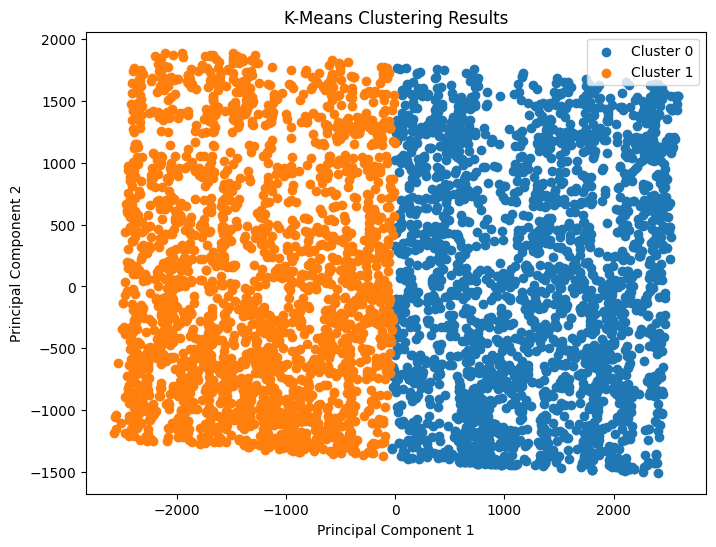

In [81]:

n_clusters = 2
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(principalDf)
labels = kmeans.labels_
principalDf['cluster'] = labels

plt.figure(figsize=(8, 6))
for i in range(n_clusters):
  plt.scatter(principalDf[principalDf['cluster'] == i]['principal component 1'],
              principalDf[principalDf['cluster'] == i]['principal component 2'],
              label=f'Cluster {i}')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Clustering Results')
plt.legend()
plt.show()


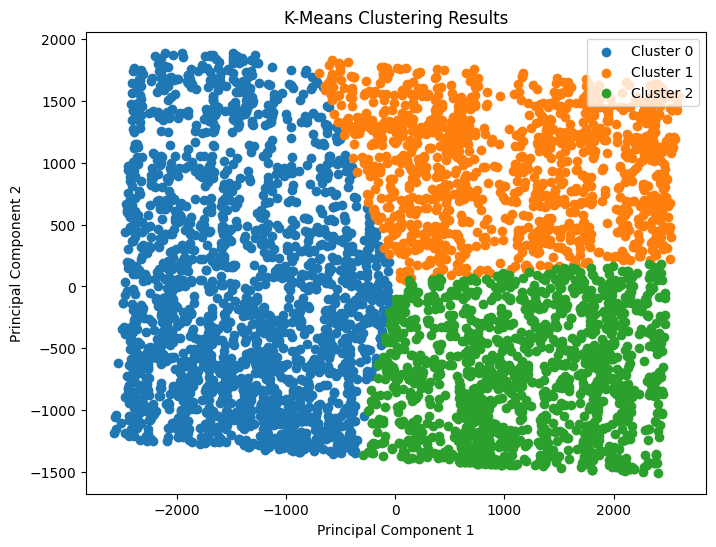

In [82]:

n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(principalDf)
labels = kmeans.labels_
principalDf['cluster'] = labels

plt.figure(figsize=(8, 6))
for i in range(n_clusters):
  plt.scatter(principalDf[principalDf['cluster'] == i]['principal component 1'],
              principalDf[principalDf['cluster'] == i]['principal component 2'],
              label=f'Cluster {i}')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Clustering Results')
plt.legend()
plt.show()

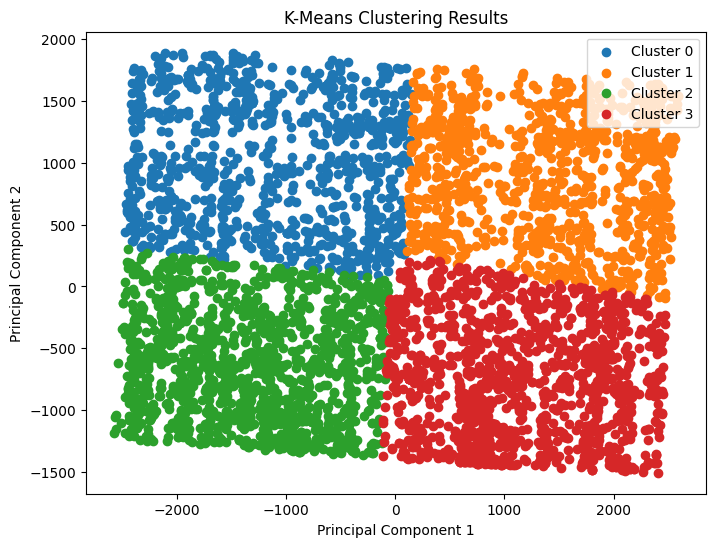

In [83]:

n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(principalDf)
labels = kmeans.labels_
principalDf['cluster'] = labels

plt.figure(figsize=(8, 6))
for i in range(n_clusters):
  plt.scatter(principalDf[principalDf['cluster'] == i]['principal component 1'],
              principalDf[principalDf['cluster'] == i]['principal component 2'],
              label=f'Cluster {i}')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Clustering Results')
plt.legend()
plt.show()

Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1485170.5000
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1478143.2500
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1486413.6250
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1483010.0000
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1498092.8750
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1478436.3750
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1506070.5000
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1480515.8750
Epoch 9/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1505392.0000
Epoch 10/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1499016.0000
Epoch 11/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1499728.2500
Epoch 12/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1493065.8750
Epoch 13/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1488633.3750
Epoch 14/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1472702.7500
E

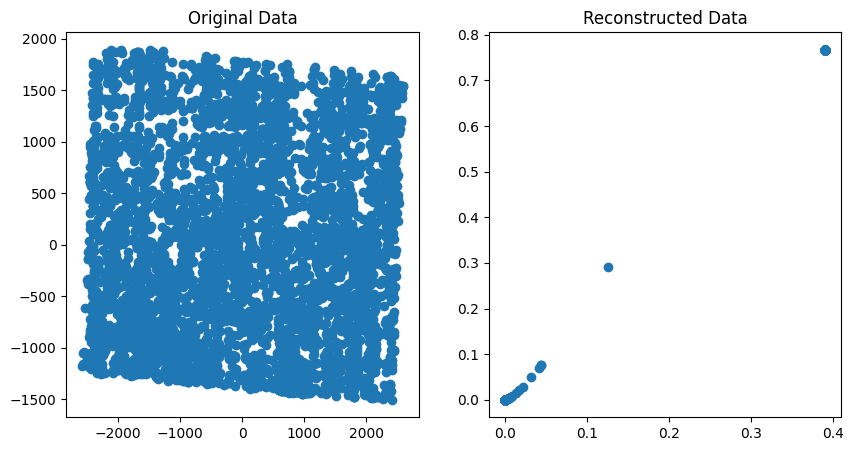

In [84]:
# prompt: buatkan saya basic auto encoder dan sertakan visualisasinya

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'principalDf' is your DataFrame with 'principal component 1' and 'principal component 2'
# Replace this with your actual data
x = principalDf[['principal component 1', 'principal component 2']].values
x = np.array(x, dtype='float32')


# Define the autoencoder model
encoding_dim = 1  # Dimensionality of the encoded representation

input_data = keras.Input(shape=(x.shape[1],))
encoded = layers.Dense(encoding_dim, activation='relu')(input_data)
decoded = layers.Dense(x.shape[1], activation='sigmoid')(encoded)

autoencoder = keras.Model(input_data, decoded)

# Encoder and Decoder models
encoder = keras.Model(input_data, encoded)
encoded_input = keras.Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1]
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))


autoencoder.compile(optimizer='adam', loss='mse')

# Train the autoencoder
autoencoder.fit(x, x,
                epochs=50,  # Adjust the number of epochs as needed
                batch_size=256,
                shuffle=True)


# Encode and decode some digits
# Note that we take them from the *test* set
encoded_data = encoder.predict(x)
decoded_data = decoder.predict(encoded_data)

# Visualize the results
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.scatter(x[:, 0], x[:, 1])
plt.title('Original Data')

plt.subplot(1, 2, 2)
plt.scatter(decoded_data[:, 0], decoded_data[:, 1])
plt.title('Reconstructed Data')

plt.show()

Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1478663.1250   
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1489962.0000 
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1498025.5000 
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1473090.6250
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1492882.2500 
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1487685.1250  
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1477756.1250 
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1490355.0000 
Epoch 9/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1472399.2500  
Epoch 10/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1483219.8750 
Epoch 11/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1505452.2500  
Epoch 12/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1518619.2500
Epoch 13/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1490729.6250 
Epoch 14/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2

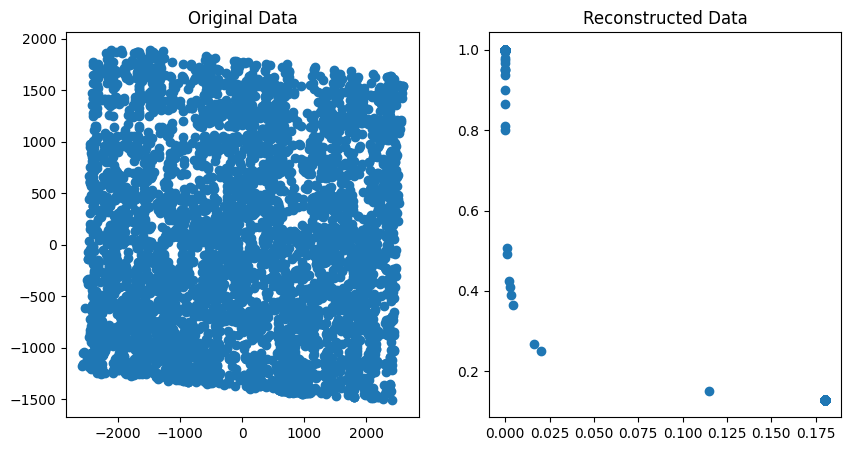

In [85]:
# prompt: Buatkan saya basic auto encoder dengan epoch nya 100 dan tampilkan visualisasinya

# Assuming 'principalDf' is your DataFrame with 'principal component 1' and 'principal component 2'
# Replace this with your actual data
x = principalDf[['principal component 1', 'principal component 2']].values
x = np.array(x, dtype='float32')


# Define the autoencoder model
encoding_dim = 1  # Dimensionality of the encoded representation

input_data = keras.Input(shape=(x.shape[1],))
encoded = layers.Dense(encoding_dim, activation='relu')(input_data)
decoded = layers.Dense(x.shape[1], activation='sigmoid')(encoded)

autoencoder = keras.Model(input_data, decoded)

# Encoder and Decoder models
encoder = keras.Model(input_data, encoded)
encoded_input = keras.Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1]
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))


autoencoder.compile(optimizer='adam', loss='mse')

# Train the autoencoder
autoencoder.fit(x, x,
                epochs=100,  # Adjust the number of epochs as needed
                batch_size=256,
                shuffle=True)


# Encode and decode some digits
# Note that we take them from the *test* set
encoded_data = encoder.predict(x)
decoded_data = decoder.predict(encoded_data)

# Visualize the results
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.scatter(x[:, 0], x[:, 1])
plt.title('Original Data')

plt.subplot(1, 2, 2)
plt.scatter(decoded_data[:, 0], decoded_data[:, 1])
plt.title('Reconstructed Data')

plt.show()

Epoch 1/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1493449.8750
Epoch 2/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1489603.1250
Epoch 3/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1490687.6250
Epoch 4/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1491209.2500
Epoch 5/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1495867.8750
Epoch 6/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1505374.8750
Epoch 7/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1498369.7500
Epoch 8/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1490474.2500
Epoch 9/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1487197.3750
Epoch 10/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1491309.7500
Epoch 11/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1467385.8750
Epoch 12/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1476633.7500
Epoch 13/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1489678.1250
Epoch 14/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1484295.0000
E

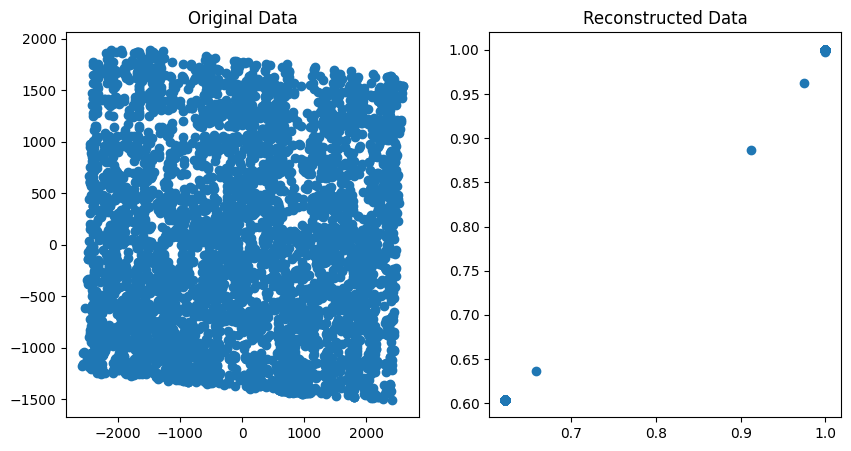

In [86]:
# prompt: Buatkan saya basic auto encoder dengan epoch nya dikecilkan jadi 25 dan tampilkan visualisasinya

# Assuming 'principalDf' is your DataFrame with 'principal component 1' and 'principal component 2'
# Replace this with your actual data
x = principalDf[['principal component 1', 'principal component 2']].values
x = np.array(x, dtype='float32')

# Define the autoencoder model
encoding_dim = 1  # Dimensionality of the encoded representation

input_data = keras.Input(shape=(x.shape[1],))
encoded = layers.Dense(encoding_dim, activation='relu')(input_data)
decoded = layers.Dense(x.shape[1], activation='sigmoid')(encoded)

autoencoder = keras.Model(input_data, decoded)

# Encoder and Decoder models
encoder = keras.Model(input_data, encoded)
encoded_input = keras.Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1]
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

autoencoder.compile(optimizer='adam', loss='mse')

# Train the autoencoder with reduced epochs
autoencoder.fit(x, x,
                epochs=25,  # Reduced epochs to 25
                batch_size=256,
                shuffle=True)

# Encode and decode some digits
encoded_data = encoder.predict(x)
decoded_data = decoder.predict(encoded_data)

# Visualize the results
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.scatter(x[:, 0], x[:, 1])
plt.title('Original Data')

plt.subplot(1, 2, 2)
plt.scatter(decoded_data[:, 0], decoded_data[:, 1])
plt.title('Reconstructed Data')

plt.show()

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


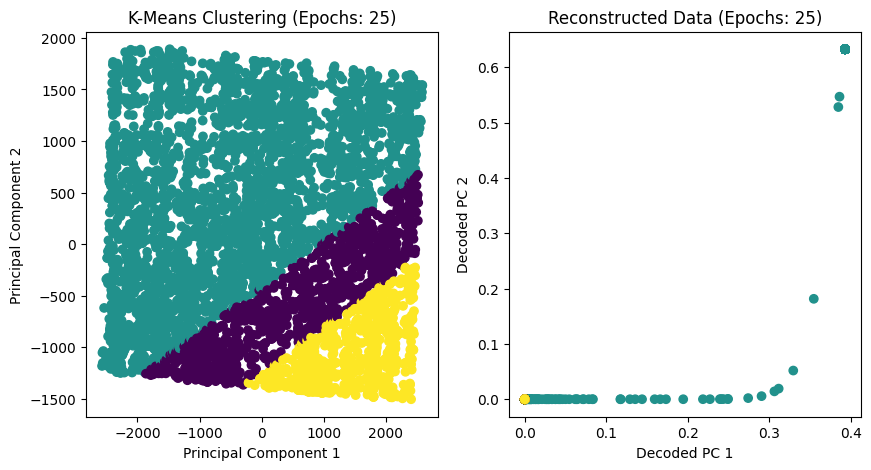

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


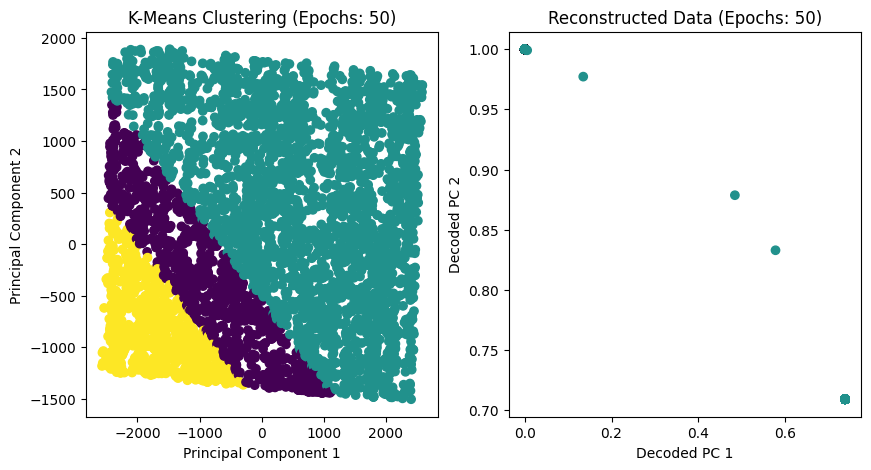

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


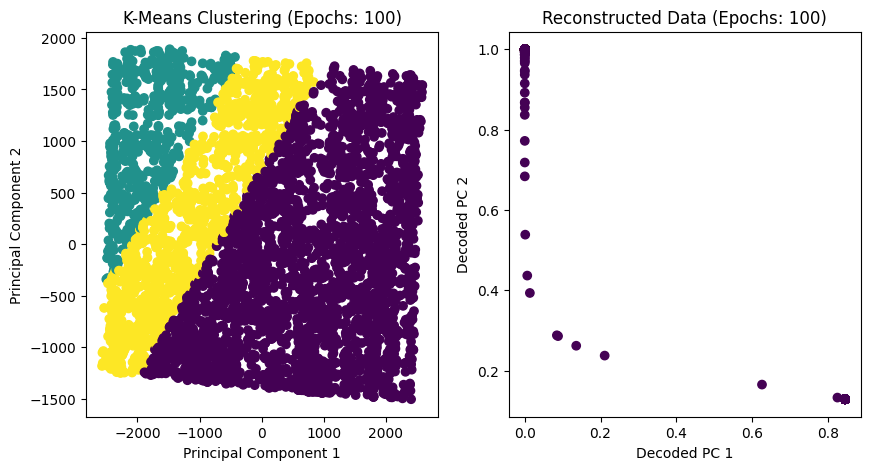

In [87]:
# prompt: Buatkan saya k-means cluster berdasarkan basic auto encoder dengan epoch 25, 50, dan 100 beserta tampilkan visualisasinya

# Assuming 'principalDf' is your DataFrame with 'principal component 1' and 'principal component 2'
# and 'x' is the NumPy array of the principal components

def perform_kmeans_autoencoder(x, epochs):
    encoding_dim = 1

    input_data = keras.Input(shape=(x.shape[1],))
    encoded = layers.Dense(encoding_dim, activation='relu')(input_data)
    decoded = layers.Dense(x.shape[1], activation='sigmoid')(encoded)

    autoencoder = keras.Model(input_data, decoded)
    encoder = keras.Model(input_data, encoded)
    encoded_input = keras.Input(shape=(encoding_dim,))
    decoder_layer = autoencoder.layers[-1]
    decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

    autoencoder.compile(optimizer='adam', loss='mse')
    autoencoder.fit(x, x, epochs=epochs, batch_size=256, shuffle=True, verbose=0)

    encoded_data = encoder.predict(x)
    decoded_data = decoder.predict(encoded_data)

    # K-Means clustering on encoded data
    n_clusters = 3 # Example, you can change this
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    kmeans.fit(encoded_data)
    labels = kmeans.labels_

    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.scatter(x[:, 0], x[:, 1], c=labels, cmap='viridis')  # Color points by cluster
    plt.title(f'K-Means Clustering (Epochs: {epochs})')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')


    plt.subplot(1, 2, 2)
    plt.scatter(decoded_data[:, 0], decoded_data[:, 1], c=labels, cmap='viridis')
    plt.title(f'Reconstructed Data (Epochs: {epochs})')
    plt.xlabel('Decoded PC 1')
    plt.ylabel('Decoded PC 2')


    plt.show()


# Perform K-Means and autoencoder for different epochs
epochs_list = [25, 50, 100]
for epochs in epochs_list:
    perform_kmeans_autoencoder(x, epochs)

In [88]:
# prompt: Buatkan adopsi hasil cell 87 ke dataset

# Assuming 'principalDf' is your DataFrame with 'principal component 1', 'principal component 2', and 'cluster' columns
# and 'df' is your original DataFrame

# Merge the cluster assignments back into the original DataFrame
df_with_clusters = pd.merge(df, principalDf[['cluster']], left_index=True, right_index=True)

# Now 'df_with_clusters' contains all the original data plus a new 'cluster' column

# Save the updated dataset
output_file_path = '/content/drive/MyDrive/Data_mining/IP___Riwayat_Medical_01012016 s.d 19032024_with_clusters22.xlsx'
df_with_clusters.to_excel(output_file_path, index=False)

print(f"Dataset with cluster assignments saved to: {output_file_path}")

Dataset with cluster assignments saved to: /content/drive/MyDrive/Data_mining/IP___Riwayat_Medical_01012016 s.d 19032024_with_clusters22.xlsx


In [89]:
# prompt: buatkan kolom baru yaitu "intepretasi_biaya" dan "intepretasi_diagnosa", untuk biaya ada rendah, sedang, tinggi, untuk diagnosa ada ringan, sedang, parah, parah sekali. Bisa ditentukan dari kolom "diagnosa", "biaya_berobat", "cluster", Untuk hasil intepretasi_diagnosa ditentukan dari hasil di kolom cluster dimana 0 ringan, 1 itu sedang, 2 parah, 3 parah_sekali buatkan untuk semua dataset dan download file

import pandas as pd

# Load the updated dataset
output_file_path = '/content/drive/MyDrive/Data_mining/IP___Riwayat_Medical_01012016 s.d 19032024_with_clusters22.xlsx'
df_with_clusters = pd.read_excel(output_file_path)

# Function to interpret biaya_berobat
def interpret_biaya(biaya):
    if biaya <= 250000:
        return 'rendah'
    elif biaya <= 750000:
        return 'sedang'
    else:
        return 'tinggi'

# Function to interpret diagnosa based on cluster
def interpret_diagnosa(cluster):
    if cluster == 0:
        return 'ringan'
    elif cluster == 1:
        return 'sedang'
    elif cluster == 2:
        return 'parah'
    elif cluster == 3:
        return 'parah sekali'
    else:
        return 'tidak diketahui' # Handle cases where cluster might not be 0, 1, 2, or 3

# Apply the functions to create new columns
df_with_clusters['intepretasi_biaya'] = df_with_clusters['biaya_berobat'].apply(interpret_biaya)
df_with_clusters['intepretasi_diagnosa'] = df_with_clusters['cluster'].apply(interpret_diagnosa)

# Display the first few rows to verify
print(df_with_clusters[['biaya_berobat', 'cluster', 'intepretasi_biaya', 'intepretasi_diagnosa']].head())

# Save the updated DataFrame with new columns
output_file_path_final = '/content/drive/MyDrive/Data_mining/IP___Riwayat_Medical_final3.xlsx'
df_with_clusters.to_excel(output_file_path_final, index=False)

print(f"Dataset with interpretations saved to: {output_file_path_final}")

from google.colab import files
files.download(output_file_path_final)

   biaya_berobat  cluster intepretasi_biaya intepretasi_diagnosa
0        1172500        0            tinggi               ringan
1         454000        0            sedang               ringan
2          59000        2            rendah                parah
3          80500        2            rendah                parah
4         586000        0            sedang               ringan
Dataset with interpretations saved to: /content/drive/MyDrive/Data_mining/IP___Riwayat_Medical_final3.xlsx


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [93]:
# prompt: pisahkan data berdasarkan clusternya, cluster0 sendiri, cluster1 sendiri, cluster2 sendiri, cluster3 sendiri, dan jadikan pada 1 file lalu download file

# Assuming 'df_with_clusters' is your DataFrame with the 'cluster' column

# Create separate DataFrames for each cluster
cluster_dfs = {cluster: df_with_clusters[df_with_clusters['cluster'] == cluster] for cluster in df_with_clusters['cluster'].unique()}

# Save each cluster DataFrame to a separate sheet in an Excel file
with pd.ExcelWriter('/content/drive/MyDrive/Data_mining/clusters_separated.xlsx') as writer:
    for cluster, df in cluster_dfs.items():
        df.to_excel(writer, sheet_name=f'Cluster_{cluster}', index=False)

# Download the file
files.download('/content/drive/MyDrive/Data_mining/clusters_separated.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>